In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("train_1.csv")

In [3]:
df.drop('id',axis=1,inplace=True)

In [4]:
X = df.drop('sales',axis=1)
y = df['sales']

In [5]:
from sklearn.model_selection import train_test_split

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101)

### Scaling

In [25]:
from sklearn.preprocessing import MinMaxScaler

In [26]:
scaler = MinMaxScaler()

In [27]:
X_train= scaler.fit_transform(X_train)

In [28]:
X_test = scaler.transform(X_test)

In [29]:
X_train.shape

(2138043, 57)

In [30]:
X_test.shape

(916305, 57)

## Creating a Model

In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

In [41]:
model = Sequential()

model.add(Dense(57,activation='relu'))
model.add(Dense(57,activation='relu'))
model.add(Dense(57,activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

## Training the Model

In [42]:
model.fit(x=X_train,y=y_train.values,
          validation_data=(X_test,y_test.values),
          batch_size=164,epochs=400)

Epoch 1/400
13037/13037 [==============================] - 38s 3ms/step - loss: 206359.5156 - val_loss: 139653.7969
Epoch 2/400
13037/13037 [==============================] - 38s 3ms/step - loss: 157692.7656 - val_loss: 131916.3281
Epoch 3/400
13037/13037 [==============================] - 36s 3ms/step - loss: 152927.8438 - val_loss: 132438.6562
Epoch 4/400
13037/13037 [==============================] - 35s 3ms/step - loss: 150020.3281 - val_loss: 127612.6719
Epoch 5/400
13037/13037 [==============================] - 35s 3ms/step - loss: 147702.1562 - val_loss: 124995.8125
Epoch 6/400
13037/13037 [==============================] - 35s 3ms/step - loss: 145693.0312 - val_loss: 122803.1875
Epoch 7/400
13037/13037 [==============================] - 35s 3ms/step - loss: 144062.2188 - val_loss: 122739.6484
Epoch 8/400
13037/13037 [==============================] - 35s 3ms/step - loss: 142475.1562 - val_loss: 120625.9297
Epoch 9/400
13037/13037 [==============================] - 36s 3ms/step 

13037/13037 [==============================] - 28s 2ms/step - loss: 121241.0156 - val_loss: 100553.4844
Epoch 72/400
13037/13037 [==============================] - 29s 2ms/step - loss: 120729.2422 - val_loss: 99627.7891
Epoch 73/400
13037/13037 [==============================] - 28s 2ms/step - loss: 120998.6328 - val_loss: 98925.2578
Epoch 74/400
13037/13037 [==============================] - 29s 2ms/step - loss: 120658.1562 - val_loss: 101919.6094
Epoch 75/400
13037/13037 [==============================] - 29s 2ms/step - loss: 120668.0469 - val_loss: 100079.4062
Epoch 76/400
13037/13037 [==============================] - 29s 2ms/step - loss: 120417.0078 - val_loss: 98425.6641
Epoch 77/400
13037/13037 [==============================] - 29s 2ms/step - loss: 120077.3828 - val_loss: 104300.8438
Epoch 78/400
13037/13037 [==============================] - 28s 2ms/step - loss: 119957.8984 - val_loss: 98525.2969
Epoch 79/400
13037/13037 [==============================] - 29s 2ms/step - loss: 

13037/13037 [==============================] - 28s 2ms/step - loss: 111500.3672 - val_loss: 91363.1797
Epoch 142/400
13037/13037 [==============================] - 28s 2ms/step - loss: 111528.3047 - val_loss: 90509.4297
Epoch 143/400
13037/13037 [==============================] - 28s 2ms/step - loss: 111474.2969 - val_loss: 91036.8906
Epoch 144/400
13037/13037 [==============================] - 29s 2ms/step - loss: 111092.8750 - val_loss: 91427.1953
Epoch 145/400
13037/13037 [==============================] - 28s 2ms/step - loss: 110845.2188 - val_loss: 89774.8750
Epoch 146/400
13037/13037 [==============================] - 29s 2ms/step - loss: 110993.4219 - val_loss: 89072.3359
Epoch 147/400
13037/13037 [==============================] - 28s 2ms/step - loss: 110894.5312 - val_loss: 90733.1094
Epoch 148/400
13037/13037 [==============================] - 29s 2ms/step - loss: 110965.9297 - val_loss: 90154.2500
Epoch 149/400
13037/13037 [==============================] - 28s 2ms/step - lo

KeyboardInterrupt: 

In [43]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

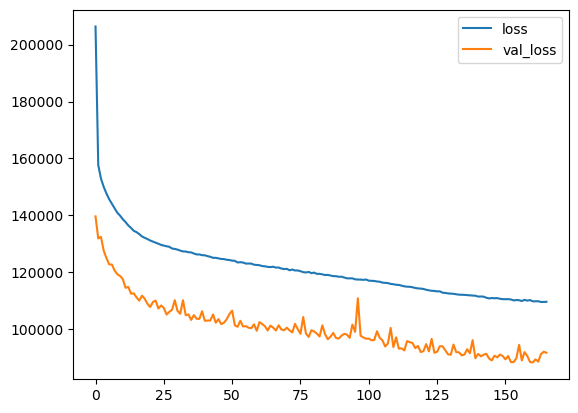

In [44]:
losses.plot()

In [45]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score

#### Predicting on Brand New Data

In [46]:
X_test

array([[0.62264151, 0.        , 0.81031539, ..., 0.        , 0.        ,
        0.        ],
       [0.05660377, 0.        , 0.18334715, ..., 0.        , 0.        ,
        0.        ],
       [0.20754717, 0.01349528, 0.30960559, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.79245283, 0.        , 0.74262703, ..., 0.        , 0.        ,
        1.        ],
       [0.96226415, 0.        , 0.83205022, ..., 0.        , 0.        ,
        0.        ],
       [0.75471698, 0.        , 0.76134076, ..., 0.        , 0.        ,
        0.        ]])

In [47]:
predictions = model.predict(X_test)

28635/28635 [==============================] - 39s 1ms/step


In [48]:
mean_absolute_error(y_test,predictions)

78.6147081980493

In [49]:
np.sqrt(mean_squared_error(y_test,predictions))

297.4615717575699

In [50]:
explained_variance_score(y_test,predictions)

0.9267578540663161

In [24]:
df['sales'].mean()

359.0208922513996

In [51]:
df['sales'].median()

11.0

In [52]:
errors = y_test.values.reshape(916305 , 1) - predictions

In [53]:
import seaborn as sns

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

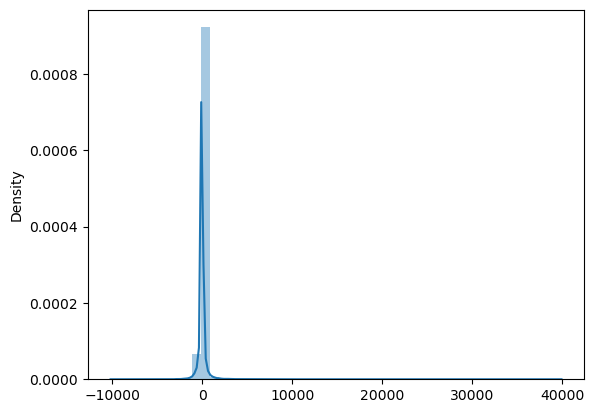

In [54]:
sns.distplot(errors)

# Predicting unknown data

In [55]:
finall = pd.read_csv('test_1.csv')

In [56]:
finall_id = finall['id'].values

In [57]:
finall.drop('id',axis=1,inplace=True)

In [58]:
Xb = finall.drop('sales',axis=1)
yb = finall['sales']

In [59]:
Xb1 = scaler.transform(Xb)

In [60]:
predictions2 = model.predict(Xb1)

891/891 [==============================] - 1s 1ms/step


In [61]:
len(finall_id)

28512

In [62]:
len(predictions2)

28512

In [63]:
num_rows = 28512
data = {'x': list(range(num_rows))}  # Generating values for 'x' column (0 to 28511)
df5 = pd.DataFrame(data)

In [64]:
df5['id'] = finall_id

In [65]:
df5['sales'] = predictions2

In [66]:
df5.drop('x',axis=1,inplace=True)

In [67]:
df5.to_csv("final_predictions.csv",index=False)